In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df_no_outliers = pd.read_csv('new_df_without_outliers_copy_smote_resampled.csv')
df_outliers = pd.read_csv('new_df_outliers_only_copy_smote_resampled.csv')

X_no_outliers = df_no_outliers.iloc[:, 0:8]
y_no_outliers = df_no_outliers['diabetes']

X_with_outliers = df_outliers.iloc[:, 0:8]
y_with_outliers = df_outliers['diabetes']


<h3> Logistic Regression on df_no_outliers<h3>

In [3]:
# split dataset to training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, 
                                                          test_size = 0.25, random_state = 2020)

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [4]:
# Confusion Matrix
print('Confusion Matrix:')
cm = confusion_matrix(y_test, lr_pred)
print(cm)

Confusion Matrix:
[[19408  3329]
 [ 2468 20081]]


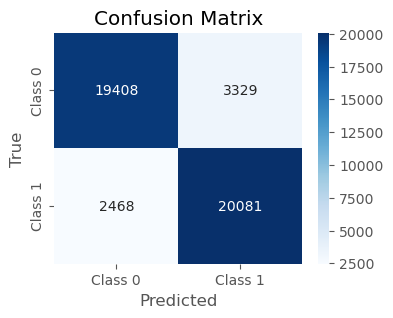

In [5]:
# Heatmap of Confusion Matrix
class_labels = ["Class 0", "Class 1"]
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [6]:
# Performance Evaluation 
print('Accuracy:')
print(accuracy_score(y_test, lr_pred))

print('\nPrecision:')
print(precision_score(y_test, lr_pred))

print('\nRecall:')
print(recall_score(y_test, lr_pred))

print('\nF1 score:')
print(f1_score(y_test, lr_pred))

print('\nROC AUC score:')
print(roc_auc_score(y_test, lr_pred))

Accuracy:
0.871991343903193

Precision:
0.8577958137548056

Recall:
0.8905494700430174

F1 score:
0.8738658369416219

ROC AUC score:
0.8720680674752186


In [7]:
print('Training Accuracy: ' + str(accuracy_score(y_train, lr.predict(X_train))))
print('Testing Accuracy: ' + str(accuracy_score(y_test, lr_pred)))

# Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits = 15, random_state = 42, shuffle = True)

cv_lr = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = kfold, scoring='accuracy')
print('Cross Validation Accuracy: ' + str(cv_lr.mean()))

Training Accuracy: 0.8706811523796906
Testing Accuracy: 0.871991343903193
Cross Validation Accuracy: 0.8705781272470449


In [8]:
# Predict whether one has diabetes or not
y_predict = lr.predict([[0.177804, 0, 0, 2.484643, -1.474115, 1.459008, -1.579747, 1.211318]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non-Diabetic")

[0]
Non-Diabetic


C:\Users\User\anaconda3_2024\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [9]:
y_predict = lr.predict([[1.349487, 1, 0, -0.241118, 0.015748, 0.263730, 1.103451, -0.578758]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non-Diabetic")

[1]
Diabetic


C:\Users\User\anaconda3_2024\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<h3> Logistic Regression on df_outliers<h3>

In [10]:
# split dataset to training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_with_outliers, y_with_outliers, 
                                                          test_size = 0.25, random_state = 2020)

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [11]:
# Confusion Matrix
print('Confusion Matrix:')
cm = confusion_matrix(y_test, lr_pred)
print(cm)

Confusion Matrix:
[[774  11]
 [ 19 738]]


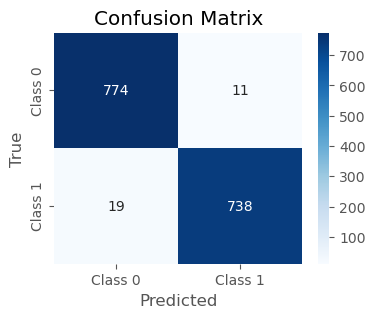

In [12]:
# Heatmap of Confusion Matrix
class_labels = ["Class 0", "Class 1"]
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [13]:
# Performance Evaluation 
print('Accuracy:')
print(accuracy_score(y_test, lr_pred))

print('\nPrecision:')
print(precision_score(y_test, lr_pred))

print('\nRecall:')
print(recall_score(y_test, lr_pred))

print('\nF1 score:')
print(f1_score(y_test, lr_pred))

print('\nROC AUC score:')
print(roc_auc_score(y_test, lr_pred))

Accuracy:
0.980544747081712

Precision:
0.9853137516688919

Recall:
0.9749009247027741

F1 score:
0.9800796812749005

ROC AUC score:
0.9804440929246355


In [14]:
print('Training Accuracy: ' + str(accuracy_score(y_train, lr.predict(X_train))))
print('Testing Accuracy: ' + str(accuracy_score(y_test, lr_pred)))

# Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits = 15, random_state = 42, shuffle = True)

cv_lr = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = kfold, scoring='accuracy')
print('Cross Validation Accuracy: ' + str(cv_lr.mean()))

Training Accuracy: 0.9664937310851708
Testing Accuracy: 0.980544747081712
Cross Validation Accuracy: 0.9664971490214209


In [15]:
# Predict whether one has diabetes or not
y_predict = lr.predict([[0.449954, 1, 1, 0.341732, -0.410728, -0.364914, -0.280453, 1.417943]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non-Diabetic")

[1]
Diabetic


C:\Users\User\anaconda3_2024\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [16]:
y_predict = lr.predict([[-1.018012, 0, 0, 0.341732, -0.410728, -0.405756, -0.280453, -0.777719]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non-Diabetic")

[0]
Non-Diabetic


C:\Users\User\anaconda3_2024\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
